In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Tweets.csv')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [3]:
#A(1)
airline_counts = df['airline'].value_counts()
print("Total count of data samples for each airline:")
print(airline_counts)

Total count of data samples for each airline:
airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64


In [4]:
#A(2)
sentiment = df['airline_sentiment']
unique_sentiments = sentiment.nunique()
print("Number of unique sentiments:", unique_sentiments)
most_frequent_sentiment = sentiment.mode()[0]
print("Most frequent sentiment:", most_frequent_sentiment)
sentiment_counts = sentiment.value_counts()
print("Sentiment frequency:")
print(sentiment_counts)

Number of unique sentiments: 3
Most frequent sentiment: negative
Sentiment frequency:
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


In [5]:
#A(3)
text = df['text']
min = min(len(x) for x in text)
print("Minimum length of a tweet:", min)
max = max(len(x) for x in text)
print("Maximum length of a tweet:", max)

Minimum length of a tweet: 12
Maximum length of a tweet: 186


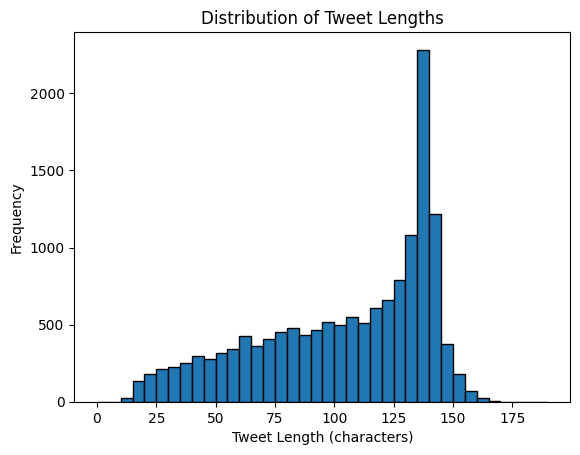

In [6]:
#A(4)
import matplotlib.pyplot as plt
lengths = [len(x) for x in text]
plt.hist(lengths, bins=range(0, max + 5, 5), edgecolor='black')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()

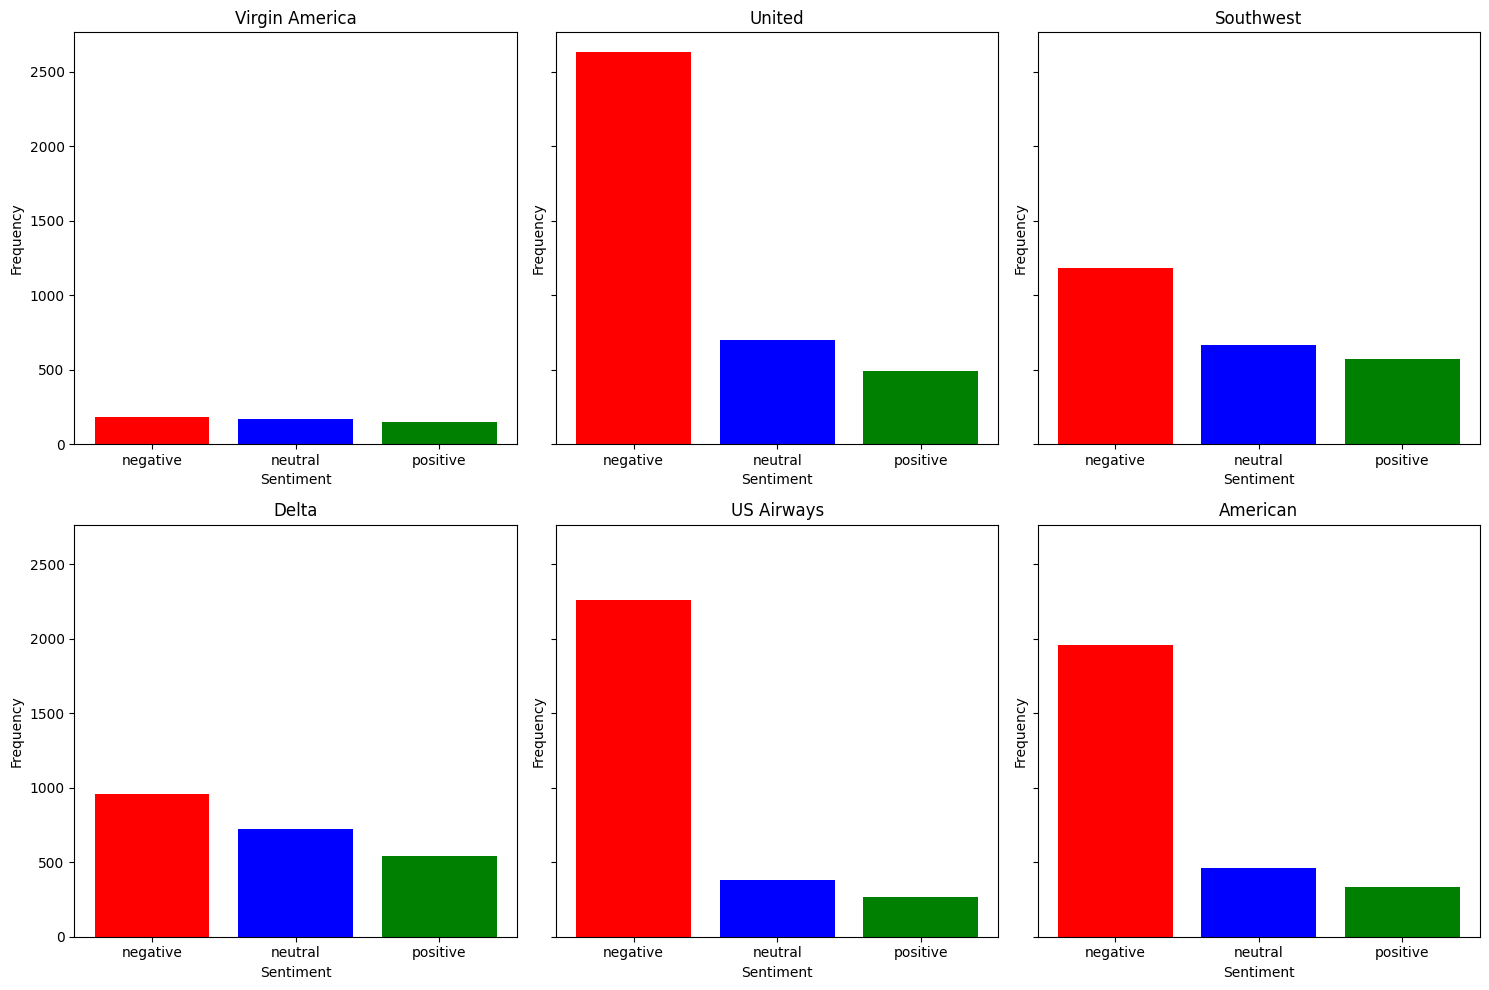

In [7]:
#B
airlines = df['airline'].unique()
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
colors = ['red', 'blue', 'green']
sentiments = ['negative', 'neutral', 'positive']

for i, airline in enumerate(airlines):
    ax = axes[i // 3, i % 3]
    airline_data = df[df['airline'] == airline]
    sentiment_counts = airline_data['airline_sentiment'].value_counts()
    sentiment_counts = sentiment_counts.reindex(sentiments, fill_value=0)
    ax.bar(sentiments, sentiment_counts, color=colors)
    ax.set_title(airline)
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [8]:
import re
#C
def custom_tokenizer(text):
    # Rule 1: Tokenize by words, including contractions
    tokens = re.findall(r"\b\w+\b(?:'\w+)?", text)
    
    # Rule 2: Separate punctuation from words
    tokens = [re.findall(r"\w+|[^\w\s]", token) for token in tokens]
    tokens = [item for sublist in tokens for item in sublist]
    
    # Rule 3: Handle URLs separately
    url_pattern = re.compile(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")
    tokens = [token if not url_pattern.match(token) else 'URL' for token in tokens]
    
    # Rule 4: Handle mentions and hashtags
    tokens = [re.sub(r"^@\w+", 'MENTION', token) for token in tokens]
    tokens = [re.sub(r"^#\w+", 'HASHTAG', token) for token in tokens]
    
    # Rule 5: Handle numbers
    tokens = [re.sub(r"^\d+$", 'NUMBER', token) for token in tokens]
    
    return tokens

In [9]:
#D
import nltk 
from nltk.tokenize import word_tokenize
# Ensure NLTK's punkt tokenizer is downloaded
nltk.download('punkt')

# Compare custom tokenizer with NLTK's tokenizer
differences = []
for i, tweet in enumerate(text[:5]):
    custom_tokens = custom_tokenizer(tweet)
    nltk_tokens = word_tokenize(tweet)
    if custom_tokens != nltk_tokens:
        differences.append((i, tweet, custom_tokens, nltk_tokens))

# Print the differences
for diff in differences:
    print(f"Example {diff[0]}:")
    print(f"Tweet: {diff[1]}")
    print(f"Custom Tokenizer: {diff[2]}")
    print(f"NLTK Tokenizer: {diff[3]}")
    print()

# Output the differences to a text file
with open('tokenizer_differences.txt', 'w') as f:
    for diff in differences:
        f.write(f"Example {diff[0]}:\n")
        f.write(f"Tweet: {diff[1]}\n")
        f.write(f"Custom Tokenizer: {diff[2]}\n")
        f.write(f"NLTK Tokenizer: {diff[3]}\n")
        f.write("\n")

Example 0:
Tweet: @VirginAmerica What @dhepburn said.
Custom Tokenizer: ['VirginAmerica', 'What', 'dhepburn', 'said']
NLTK Tokenizer: ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']

Example 1:
Tweet: @VirginAmerica plus you've added commercials to the experience... tacky.
Custom Tokenizer: ['VirginAmerica', 'plus', 'you', "'", 've', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']
NLTK Tokenizer: ['@', 'VirginAmerica', 'plus', 'you', "'ve", 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.']

Example 2:
Tweet: @VirginAmerica I didn't today... Must mean I need to take another trip!
Custom Tokenizer: ['VirginAmerica', 'I', 'didn', "'", 't', 'today', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip']
NLTK Tokenizer: ['@', 'VirginAmerica', 'I', 'did', "n't", 'today', '...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip', '!']

Example 3:
Tweet: @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in y

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Stell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
